In [1]:
import pandas as pd
import numpy as np

In [2]:
wines = pd.read_csv("XWines_Test_100_wines.csv", encoding="utf-8")
ratings = pd.read_csv("XWines_Test_1K_ratings.csv", low_memory=False)

# wines = pd.read_csv("All-XWines_Full_100K_wines_21M_ratings\XWines_Full_100K_wines.csv", encoding="utf-8")
# ratings = pd.read_csv("All-XWines_Full_100K_wines_21M_ratings\XWines_Full_21M_ratings.csv", low_memory=False)

In [3]:
wines.head(2)

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100062,Origem Merlot,Red,Varietal/100%,['Merlot'],"['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...",13.0,Full-bodied,Medium,BR,Brazil,1002,Vale dos Vinhedos,10014,Casa Valduga,http://www.casavalduga.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
1,100191,Reserva Chardonnay,White,Varietal/100%,['Chardonnay'],"['Rich Fish', 'Seafood', 'Risotto', 'Poultry',...",13.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


In [4]:
wines.columns

Index(['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'ABV',
       'Body', 'Acidity', 'Code', 'Country', 'RegionID', 'RegionName',
       'WineryID', 'WineryName', 'Website', 'Vintages'],
      dtype='object')

In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WineID      100 non-null    int64  
 1   WineName    100 non-null    object 
 2   Type        100 non-null    object 
 3   Elaborate   100 non-null    object 
 4   Grapes      100 non-null    object 
 5   Harmonize   100 non-null    object 
 6   ABV         100 non-null    float64
 7   Body        100 non-null    object 
 8   Acidity     100 non-null    object 
 9   Code        100 non-null    object 
 10  Country     100 non-null    object 
 11  RegionID    100 non-null    int64  
 12  RegionName  100 non-null    object 
 13  WineryID    100 non-null    int64  
 14  WineryName  100 non-null    object 
 15  Website     100 non-null    object 
 16  Vintages    100 non-null    object 
dtypes: float64(1), int64(3), object(13)
memory usage: 13.4+ KB


In [6]:
wines = wines[
    [
        "WineID",
        "WineName",
        "Type",
        "Elaborate",
        "Grapes",
        "Harmonize",
        "ABV",
        "Body",
        "Acidity",
        "Country",
        "RegionID",
        "WineryID",
        "RegionName",
        "WineryName"
    ]
]

In [7]:
wines.head(3)

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Country,RegionID,WineryID,RegionName,WineryName
0,100062,Origem Merlot,Red,Varietal/100%,['Merlot'],"['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...",13.0,Full-bodied,Medium,Brazil,1002,10014,Vale dos Vinhedos,Casa Valduga
1,100191,Reserva Chardonnay,White,Varietal/100%,['Chardonnay'],"['Rich Fish', 'Seafood', 'Risotto', 'Poultry',...",13.0,Medium-bodied,Medium,Brazil,1001,10000,Serra Gaúcha,Aurora
2,101847,Dona Antonia Porto Reserva Tawny,Dessert/Port,Assemblage/Blend,"['Touriga Nacional', 'Touriga Franca', 'Tinta ...","['Appetizer', 'Sweet Dessert', 'Blue Cheese']",20.0,Very full-bodied,High,Portugal,1031,10674,Porto,Porto Ferreira


In [8]:
wines['Grapes'] = wines['Grapes'].str.replace("[", " ").str.replace("]", " ").str.replace("'", "").str.strip()
wines['Grapes'].head()

0                                               Merlot
1                                           Chardonnay
2    Touriga Nacional, Touriga Franca, Tinta Barroc...
3    Tinta Amarela, Tinta Barroca, Touriga Franca, ...
4                          Loureiro, Alvarinho, Arinto
Name: Grapes, dtype: object

In [9]:
wines['Body'] = wines['Body'].str.replace('-', '')
wines['Body'].head()

0          Fullbodied
1        Mediumbodied
2     Very fullbodied
3     Very fullbodied
4    Very lightbodied
Name: Body, dtype: object

In [10]:
wines["Harmonize"] = wines["Harmonize"].str.replace("[", " ").str.replace("]", " ").str.replace("'", "").str.strip()
wines["Harmonize"].head()

0             Beef, Lamb, Veal, Grilled, Pizza, Pasta
1    Rich Fish, Seafood, Risotto, Poultry, Vegetarian
2               Appetizer, Sweet Dessert, Blue Cheese
3             Sweet Dessert, Cake, Fruit, Soft Cheese
4       Fish, Shellfish, Vegetarian, Appetizer, Snack
Name: Harmonize, dtype: object

In [11]:
wines.head(3)

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Country,RegionID,WineryID,RegionName,WineryName
0,100062,Origem Merlot,Red,Varietal/100%,Merlot,"Beef, Lamb, Veal, Grilled, Pizza, Pasta",13.0,Fullbodied,Medium,Brazil,1002,10014,Vale dos Vinhedos,Casa Valduga
1,100191,Reserva Chardonnay,White,Varietal/100%,Chardonnay,"Rich Fish, Seafood, Risotto, Poultry, Vegetarian",13.0,Mediumbodied,Medium,Brazil,1001,10000,Serra Gaúcha,Aurora
2,101847,Dona Antonia Porto Reserva Tawny,Dessert/Port,Assemblage/Blend,"Touriga Nacional, Touriga Franca, Tinta Barroc...","Appetizer, Sweet Dessert, Blue Cheese",20.0,Very fullbodied,High,Portugal,1031,10674,Porto,Porto Ferreira


In [12]:
def check_special_characters(df, column_name, special_characters_pattern):
    rows_with_special_characters = df[df[column_name].str.contains(special_characters_pattern, regex=True, na=False)]
    row_count = len(rows_with_special_characters)
    print("Number of rows with special characters in {}: {}".format(column_name, row_count))
    print(rows_with_special_characters[[column_name]].drop_duplicates().sort_values(by=column_name))

In [13]:
import re
def remove_special_characters(df, column_name, characters_to_remove):
    df[column_name] = df[column_name].str.replace(f'[{re.escape(characters_to_remove)}]', ' ', regex=True)
    return df

In [14]:
characters_to_remove = '[!"#$%°&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

In [15]:
check_special_characters(wines, 'WineName', characters_to_remove)

Number of rows with special characters in WineName: 20
                                        WineName
53                                Barbera d'Alba
48                             Brachetto d'Acqui
75                     Cabernet Sauvignon-Shiraz
35                   Chablis 1er Cru 'Montmains'
25          Château Chemin Royal Moulis-en-Médoc
29                        Cinsault-Grenache Rosé
22                Coteaux d'Aix-en-Provence Rosé
50                         Dulcis Moscato d'Asti
31           Les Fuées Chambolle-Musigny 1er Cru
34                        Marc d'Alsace Riesling
37     Meursault 1er Cru 'La Pièce Sous Le Bois'
40                        Nicolon Barbera d'Alba
28                 Nuits-St-Georges Les Plateaux
24                                Pessac-Léognan
21  Pommard Premier Cru 'Grand Clos des Épenots'
63   Rare Cream Sherry Superior (Solera Reserva)
47                         Riserva Prêt-A-Porter
19          Sauternes (Premier Grand Cru Classé)
52            

In [16]:
wines = remove_special_characters(wines, 'WineName', characters_to_remove)
check_special_characters(wines, 'WineName', characters_to_remove)

Number of rows with special characters in WineName: 0
Empty DataFrame
Columns: [WineName]
Index: []


In [17]:
check_special_characters(wines, 'RegionName', characters_to_remove)

Number of rows with special characters in RegionName: 17
                                   RegionName
40                             Barbera d'Alba
48                          Brachetto d'Acqui
67                        Central Valley (CL)
35                Chablis 1er Cru 'Montmains'
31                          Chambolle-Musigny
20                          Gevrey-Chambertin
37  Meursault 1er Cru 'La pièce sous le Bois'
64                           Montilla-Moriles
50                             Moscato d'Asti
25                            Moulis-en-Médoc
28                        Nuits-Saint-Georges
24                             Pessac-Léognan
46                        Südtirol-Alto Adige
95     Taman Peninsula (Таманский полуостров)
45                              Vino d'Italia


In [18]:
wines = remove_special_characters(wines, 'RegionName', characters_to_remove)
check_special_characters(wines, 'RegionName', characters_to_remove)

Number of rows with special characters in RegionName: 0
Empty DataFrame
Columns: [RegionName]
Index: []


In [19]:
check_special_characters(wines, 'WineryName', characters_to_remove)

Number of rows with special characters in WineryName: 7
                         WineryName
43                  Cavaliere d'Oro
24           Château Pontet-Caillou
35                 J. Moreau & Fils
28                Mongeard-Mugneret
22                Moonlight & Roses
76                Taylors/Wakefield
16  Weingut Nik Weis-St. Urbans-Hof


In [20]:
wines = remove_special_characters(wines, 'WineryName', characters_to_remove)
check_special_characters(wines, 'WineryName', characters_to_remove)

Number of rows with special characters in WineryName: 0
Empty DataFrame
Columns: [WineryName]
Index: []


In [21]:
wines.isnull().sum()

WineID        0
WineName      0
Type          0
Elaborate     0
Grapes        0
Harmonize     0
ABV           0
Body          0
Acidity       0
Country       0
RegionID      0
WineryID      0
RegionName    0
WineryName    0
dtype: int64

In [22]:
def split_and_expand_columns(df, column_name, delimiter="/"):
    expanded_columns = df[column_name].str.split(delimiter, expand=True)
    new_columns = [f"{column_name}{i+1}" for i in range(expanded_columns.shape[1])]
    expanded_columns.columns = new_columns

    df = pd.concat([df, expanded_columns], axis=1)
    df = df.fillna("")
    df = df.drop(columns=[column_name])

    return df

In [23]:
wines = split_and_expand_columns(wines, "Harmonize", delimiter=", ")

In [24]:
wines = split_and_expand_columns(wines, "Grapes", delimiter=", ")

In [25]:
wines = split_and_expand_columns(wines, "Elaborate")

In [26]:
wines = split_and_expand_columns(wines, "Type")

In [27]:
print(wines.head(3).to_markdown())

|    |   WineID | WineName                         |   ABV | Body            | Acidity   | Country   |   RegionID |   WineryID | RegionName        | WineryName     | Harmonize1   | Harmonize2    | Harmonize3   | Harmonize4   | Harmonize5   | Harmonize6   | Grapes1          | Grapes2        | Grapes3       | Grapes4       | Grapes5   | Grapes6   | Grapes7   | Grapes8   | Grapes9   | Elaborate1   | Elaborate2   | Type1   | Type2   |
|---:|---------:|:---------------------------------|------:|:----------------|:----------|:----------|-----------:|-----------:|:------------------|:---------------|:-------------|:--------------|:-------------|:-------------|:-------------|:-------------|:-----------------|:---------------|:--------------|:--------------|:----------|:----------|:----------|:----------|:----------|:-------------|:-------------|:--------|:--------|
|  0 |   100062 | Origem Merlot                    |    13 | Fullbodied      | Medium    | Brazil    |       1002 |      10014 | V

In [28]:
common_columns = ['WineName', 'Body', 'Acidity', 'Country', 'RegionName', 'WineryName', 'ABV']
grapes_columns = [f'Grapes{i}' for i in range(1, 10)]
harmonize_columns = [f'Harmonize{i}' for i in range(1, 7)]
type_columns = [f'Type{i}' for i in range(1, 3)]
elaborate_columns = [f'Elaborate{i}' for i in range(1, 3)]
all_columns = common_columns + grapes_columns + harmonize_columns + type_columns + elaborate_columns
wines['Attributes'] = wines[all_columns].astype(str).agg(' '.join, axis=1)

In [29]:
print(wines['Attributes'].head(3).to_markdown())

|    | Attributes                                                                                                                                                                                                                     |
|---:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Origem Merlot Fullbodied Medium Brazil Vale dos Vinhedos Casa Valduga 13.0 Merlot         Beef Lamb Veal Grilled Pizza Pasta Red  Varietal 100%                                                                                |
|  1 | Reserva Chardonnay Mediumbodied Medium Brazil Serra Gaúcha Aurora 13.0 Chardonnay         Rich Fish Seafood Risotto Poultry Vegetarian  White  Varietal 100%                                                                   |
|  2 | Dona Antonia Porto Reserva Tawny Very fullbodied High Portugal Po

Build model:
- tranform attributes (features) of wines to tf-idf
- compute simmilarity between wine items based on tf-idf


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# fit and transform the Attributes column
tfidf_matrix = vectorizer.fit_transform(wines['Attributes'])

# shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(100, 594)


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine similarity matrix between wines
wine_similarities = cosine_similarity(tfidf_matrix)

# shape of the similarity matrix
print(wine_similarities.shape)


(100, 100)


In [32]:
print(type(wine_similarities))

<class 'numpy.ndarray'>


In [33]:
import numpy as np

# save similarity matrix to file
np.save('wine_similarities.npy', wine_similarities)

In [47]:
ratings.head(2).to_markdown

<bound method DataFrame.to_markdown of    RatingID   UserID  WineID Vintage  Rating                 Date
0      3211  1209683  111478    1959     4.5  2016-08-08 00:50:22
1     27878  1209980  111478    1975     4.0  2018-08-12 17:09:39>

In [34]:
# create a set of all wine IDs
all_wine_ids = set(ratings['WineID'].unique())

In [35]:
def get_unrated_wines(user_id, train_ratings, all_wine_ids):
    '''
    Get the list of wines that the user has not rated
    @param user_id: user ID
    '''
    rated_wines = set(train_ratings[train_ratings['UserID'] == user_id]['WineID'].unique())
    unrated_wines = all_wine_ids - rated_wines
    return list(unrated_wines)

In [36]:
import numpy as np

# mapping between WineID and matrix index
wine_id_to_idx = {wine_id: idx for idx, wine_id in enumerate(wines['WineID'])}
idx_to_wine_id = {idx: wine_id for idx, wine_id in enumerate(wines['WineID'])}

In [37]:
def get_k_similar_wines(unrated_wine, rated_wines, similarity_matrix, k=5):
    similarities = []
    if unrated_wine not in wine_id_to_idx:
        return similarities  # No similarity data for this wine
    
    unrated_wine_idx = wine_id_to_idx[unrated_wine]
    
    for rated_wine in rated_wines:
        if rated_wine not in wine_id_to_idx:
            continue  # Skip if rated wine not in mapping
        rated_wine_idx = wine_id_to_idx[rated_wine]
        similarity = similarity_matrix[unrated_wine_idx, rated_wine_idx]
        similarities.append((rated_wine, similarity))
    
    # Sort by similarity and select top k
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:k]

In [38]:
def predict_rating(user_id, unrated_wine, train_ratings, k=5):
    user_ratings = train_ratings[train_ratings['UserID'] == user_id][['WineID', 'Rating']]
    rated_wines = user_ratings['WineID'].tolist()
    
    if len(rated_wines) == 0:
        return np.nan  # Shouldn't happen with group-wise splitting
    
    k_similar_wines = get_k_similar_wines(unrated_wine, rated_wines, wine_similarities, k)
    
    numerator = 0
    denominator = 0
    for wine, similarity in k_similar_wines:
        rating = user_ratings[user_ratings['WineID'] == wine]['Rating'].values[0]
        numerator += similarity * rating
        denominator += abs(similarity)
    
    if denominator == 0:
        # Impute with user's average rating from training set
        user_mean = user_ratings['Rating'].mean()
        return user_mean
    
    return numerator / denominator

In [39]:
# Predict all ratings for a given user
def predict_all_ratings(user_id, k=5):
    unrated_wines = get_unrated_wines(user_id, ratings, all_wine_ids)
    predictions = {}
    
    for wine in unrated_wines:
        predicted_rating = predict_rating(user_id, wine, ratings, k)
        predictions[wine] = predicted_rating
    
    return predictions

# Recommend top-N wines to the user based on predicted ratings
def recommend_wines(user_id, k=5, N=10):
    predicted_ratings = predict_all_ratings(user_id, k)
    # Sort wines by predicted rating in descending order
    recommended_wines = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
    
    return recommended_wines[:N]  # Return top N recommended wines

In [40]:
# Example usage
user_id = 1209683
top_recommendations = recommend_wines(user_id, k=5, N=10)

# Print the top 10 recommendations for the user
print(top_recommendations)

[(190621, 4.419116132688848), (154979, 4.272635902699536), (160271, 4.195473937768131), (101847, 4.013068094857787), (187359, 3.9943605542847114), (143222, 3.9537594761053647), (105748, 3.915394644366814), (102055, 3.915394644366814), (105911, 3.8675245142749737), (160277, 3.861362027959953)]


In [41]:
from sklearn.model_selection import GroupShuffleSplit

def split_ratings_groupwise(ratings, test_size=0.2, random_state=42):
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    train_idx, test_idx = next(gss.split(ratings, groups=ratings['UserID']))
    train_ratings = ratings.iloc[train_idx].reset_index(drop=True)
    test_ratings = ratings.iloc[test_idx].reset_index(drop=True)
    return train_ratings, test_ratings

# Perform the group-wise split
train_ratings, test_ratings = split_ratings_groupwise(ratings, test_size=0.2)

print(f"Training set size: {train_ratings.shape}")
print(f"Test set size: {test_ratings.shape}")


Training set size: (801, 6)
Test set size: (199, 6)


In [42]:

def predict_test_set_ratings(test_ratings, train_ratings, k=5):
    predictions = []
    true_ratings = []
    
    for index, row in test_ratings.iterrows():
        user_id = row['UserID']
        wine_id = row['WineID']
        true_rating = row['Rating']
        
        predicted_rating = predict_rating(user_id, wine_id, train_ratings, k)
        
        # Handle cases where prediction could still be NaN
        if np.isnan(predicted_rating):
            # Option 1: Impute with user's mean rating from training set
            user_train_ratings = train_ratings[train_ratings['UserID'] == user_id]['Rating']
            if len(user_train_ratings) > 0:
                predicted_rating = user_train_ratings.mean()
            else:
                # Option 2: Impute with global mean rating
                predicted_rating = train_ratings['Rating'].mean()
        
        predictions.append(predicted_rating)
        true_ratings.append(true_rating)
    
    return np.array(predictions), np.array(true_ratings)

In [43]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(predicted_ratings, true_ratings):
    mse = mean_squared_error(true_ratings, predicted_ratings)
    rmse = np.sqrt(mse)
    return rmse

# 4. Perform Group-wise Train-Test Split
def split_ratings_groupwise(ratings, test_size=0.2, random_state=42):
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    train_idx, test_idx = next(gss.split(ratings, groups=ratings['UserID']))
    train_ratings = ratings.iloc[train_idx].reset_index(drop=True)
    test_ratings = ratings.iloc[test_idx].reset_index(drop=True)
    return train_ratings, test_ratings

train_ratings, test_ratings = split_ratings_groupwise(ratings, test_size=0.2)

print(f"Training set size: {train_ratings.shape}")
print(f"Test set size: {test_ratings.shape}")

# 5. Predict Ratings for the Test Set
predicted_ratings, true_ratings = predict_test_set_ratings(test_ratings, train_ratings, k=5)

# 6. Calculate and Print RMSE
rmse = calculate_rmse(predicted_ratings, true_ratings)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Training set size: (801, 6)
Test set size: (199, 6)
Root Mean Squared Error (RMSE): 0.6612954551421897


In [44]:
from sklearn.model_selection import GroupKFold

def cross_validate(ratings, k_folds=5, test_size=0.2, k=5):
    gkf = GroupKFold(n_splits=k_folds)
    rmse_scores = []
    
    for train_idx, test_idx in gkf.split(ratings, groups=ratings['UserID']):
        train_ratings_fold = ratings.iloc[train_idx].reset_index(drop=True)
        test_ratings_fold = ratings.iloc[test_idx].reset_index(drop=True)
        
        predicted, true = predict_test_set_ratings(test_ratings_fold, train_ratings_fold, k)
        
        # Handle any remaining NaNs
        if np.isnan(predicted).sum() > 0:
            user_means = train_ratings_fold.groupby('UserID')['Rating'].mean().to_dict()
            predicted = [user_means.get(uid, train_ratings_fold['Rating'].mean()) 
                         if np.isnan(r) else r for r, uid in zip(predicted, test_ratings_fold['UserID'])]
            predicted = np.array(predicted)
        
        rmse = calculate_rmse(predicted, true)
        rmse_scores.append(rmse)
        print(f"Fold RMSE: {rmse}")
    
    print(f"Average RMSE across {k_folds} folds: {np.mean(rmse_scores)}")

# Example usage:
cross_validate(ratings, k_folds=5, test_size=0.2, k=5)

Fold RMSE: 0.6922427319950712
Fold RMSE: 0.6550169964397871
Fold RMSE: 0.7200219723209841
Fold RMSE: 0.6833053856073432
Fold RMSE: 0.7755894935466829
Average RMSE across 5 folds: 0.7052353159819738


Fold RMSE: 0.6922427319950712, F1: 0.8795518207282913
Fold RMSE: 0.6550169964397871, F1: 0.8980716253443526
Fold RMSE: 0.7200219723209841, F1: 0.8668555240793201
Fold RMSE: 0.6833053856073432, F1: 0.8732394366197184
Fold RMSE: 0.7755894935466829, F1: 0.8950276243093923
Average RMSE across 5 folds: 0.7052353159819738
Average F1 across 5 folds: 0.882549206216215


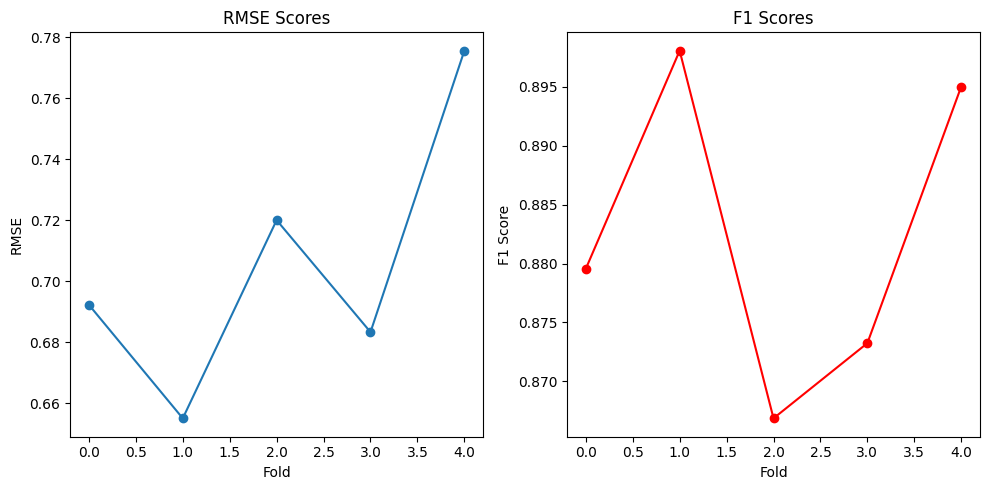

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GroupKFold

def evaluate_model(test_ratings, train_ratings, k=5):
    predictions = []
    true_ratings = []
    
    for index, row in test_ratings.iterrows():
        user_id = row['UserID']
        wine_id = row['WineID']
        true_rating = row['Rating']
        
        predicted_rating = predict_rating(user_id, wine_id, train_ratings, k)
        
        # Handle cases where prediction could still be NaN
        if np.isnan(predicted_rating):
            user_train_ratings = train_ratings[train_ratings['UserID'] == user_id]['Rating']
            if len(user_train_ratings) > 0:
                predicted_rating = user_train_ratings.mean()
            else:
                predicted_rating = train_ratings['Rating'].mean()
        
        predictions.append(predicted_rating)
        true_ratings.append(true_rating)
    
    return np.array(predictions), np.array(true_ratings)

def calculate_precision_recall_f1(predicted_ratings, true_ratings, threshold=3.5):
    # Binarize the ratings based on the threshold
    predicted_binary = (predicted_ratings >= threshold).astype(int)
    true_binary = (true_ratings >= threshold).astype(int)
    
    precision, recall, f1, _ = precision_recall_fscore_support(true_binary, predicted_binary, average='binary')
    return precision, recall, f1

def cross_validate_with_metrics(ratings, k_folds=5, k=5, threshold=3.5):
    gkf = GroupKFold(n_splits=k_folds)
    rmse_scores = []
    f1_scores = []
    
    for train_idx, test_idx in gkf.split(ratings, groups=ratings['UserID']):
        train_ratings_fold = ratings.iloc[train_idx].reset_index(drop=True)
        test_ratings_fold = ratings.iloc[test_idx].reset_index(drop=True)
        
        predicted, true = evaluate_model(test_ratings_fold, train_ratings_fold, k)
        
        # Handle any remaining NaNs
        if np.isnan(predicted).sum() > 0:
            user_means = train_ratings_fold.groupby('UserID')['Rating'].mean().to_dict()
            predicted = [user_means.get(uid, train_ratings_fold['Rating'].mean()) 
                         if np.isnan(r) else r for r, uid in zip(predicted, test_ratings_fold['UserID'])]
            predicted = np.array(predicted)
        
        rmse = calculate_rmse(predicted, true)
        _, _, f1 = calculate_precision_recall_f1(predicted, true, threshold)
        
        rmse_scores.append(rmse)
        f1_scores.append(f1)
        
        print(f"Fold RMSE: {rmse}, F1: {f1}")
    
    print(f"Average RMSE across {k_folds} folds: {np.mean(rmse_scores)}")
    print(f"Average F1 across {k_folds} folds: {np.mean(f1_scores)}")
    
    # Plotting the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(rmse_scores, marker='o')
    plt.title('RMSE Scores')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')

    plt.subplot(1, 2, 2)
    plt.plot(f1_scores, marker='o', color='red')
    plt.title('F1 Scores')
    plt.xlabel('Fold')
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.show()

cross_validate_with_metrics(ratings, k_folds=5, k=5, threshold=3.5)
